Before you turn this homework in, make sure everything runs as expected. First, **restart the kernel** and then **run all cells** (in the menubar, select Kernel$\rightarrow$Restart \& Run all). If you get error messages, the grader will get the same errors and won't be able to grade your work. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". You may delete the line(s) that say "**raise** NotImplementedError()" and replace them with your actual work. Write all your work in the cells provided in this notebook. **DO NOT** add or delete any cells. 

Please fill in your name in the cell below.

In [1]:
NAME = "Zander Bonnet"

---

## Problem 1

We're continuing to practice data wrangling with Pandas. The dataset we'll consider for this problem is the CDC dataset on COVID-19 rates of hospitalization and deaths by age group and vaccination status that was used on your second midterm exam. The data you worked with on the exam was a subset of this data set which was downloaded from [the CDC website](https://data.cdc.gov/Public-Health-Surveillance/Rates-of-COVID-19-Cases-or-Deaths-by-Age-Group-and/3rge-nu2a/data). Please download the dataset directly from the CDC website (click on the Export button (see image on Canvas) and choose the "csv for Excel" option. Do not make any changes to the csv file before importing it into Pandas. 

The variables in this dataset are:
* outcome (case or death)
* month
* MMWR week (epidemiological weeks of the year, ranging from Sunday to Saturday)
* Age group
* Vaccine product
* Vaccinated with outcome (means fully vaccinated 
with one full series of shots)
* Fully vaccinated population 
* Unvaccinated (partially vaccinated people are not included in this data set)
* Unvaccinated population 
* Crude vax IR (incidence rates: ratio of vaccinated case/vaccinated population)*100k
* Crude unvax IR (incidence rates: ratio of unvaccinated case/unvaccinated population)*100k
* Crude IRR (incidence rate ratio: ratio of crude vax IR/Crude unvax IR)
* Age adjusted vax IR (there are not equally many people in all the age groups. When age groups are combined, the IR is a weighted average of the groups)
* Age adjusted unvax IR (see above)
* Age adjusted IRR (see above)
* Continuity correction (fineprint from the CDC website says: "Continuity correction: A continuity correction has been applied to the denominators by capping the percent population coverage at 95%. To do this, we assumed that at least 5% of each age group would always be unvaccinated in each jurisdiction. Adding this correction ensures that there is always a reasonable denominator for the unvaccinated population that would prevent incidence and death rates from growing unrealistically large due to potential overestimates of vaccination coverage.")

This is a true data wrangling problem. The purpose of this exercise is to illustrate what frequently happens when you work with data downloaded in some format (here csv) from some reputable source. In your real jobs, you would have to identify all the issues yourself (which is usually the most time consuming part). When working with these data, one would like to probably graph COVID-19 rates as a function of time, vaccine status, age-group etc. 

(a) Import the csv file into Pandas as a Data Frame named 'data'. What is the current data type of the column 'Crude vax IR'? We would like the entries in this column to be numeric. Convert them to floats. 

Hint: There is something that currently prevents you from just converting them to numeric with the command ```pd.to_numeric()```. Find out what that is. Describe the issue in the markdown box below and fix it. 

In [2]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
file = '/Users/zanderbonnet/Desktop/Math 167PS/Homework/Data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv'
data = pd.read_csv(file)

# uncomment this line when you're done so that the grader can see the result of your conversion
data['Crude vax IR'].values.dtype

#data

dtype('float64')

It already is type float

(b) Write Pandas code to create a new column 'Time' in format yyyy/mm. You can get the year information out of the `MMWR week` column and the month out of the 'month' column. Please pad the months (04 instead of 4) so that the times in yyyy/mm format can be ordered meaningfully. Display your modified data frame so that the grader can see it. Put your new 'Time' column on the left so that the grader can see it without scrolling.

In [3]:
# YOUR CODE HERE
dates = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', "JUN", "JUL", 'AUG', 'SEP', 'OCT', 'NOV', "DEC"]
nums = ['01','02','03','04','05','06','07','08','09','10','11','12']
dateMap = pd.DataFrame({'Months':dates, 'numbers':nums})
Time = []
for i in range(len(data)):
    raw = data.iloc[i]['month']
    month = raw[0:3]
    year = raw[4:8]
    monthVal = dateMap[dateMap.Months == month]['numbers'].values[0]
    Time.append(year + '/' + monthVal)
data.insert(0, 'Time', Time)
data


,Time,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
0,2021/04,case,APR 2021,202114,12-17,all_types,4,32950.0,27310,15994448.0,12.139605,170.746749,14.065263,NaN,NaN,NaN,0
1,2021/04,case,APR 2021,202114,18-29,all_types,534,2354024.0,67219,28351677.0,22.684561,237.090032,10.451603,NaN,NaN,NaN,0
2,2021/04,case,APR 2021,202114,30-49,all_types,1486,6849914.0,85688,37230385.0,21.693703,230.156094,10.609350,NaN,NaN,NaN,0
3,2021/04,case,APR 2021,202114,50-64,all_types,1217,6800881.0,43509,20828144.0,17.894740,208.895233,11.673555,NaN,NaN,NaN,0
4,2021/04,case,APR 2021,202114,65-79,all_types,1299,13424610.0,12391,6972605.0,9.676259,177.709766,18.365545,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2022/02,death,FEB 2022,202208,80+,all_types,231,5878474.0,244,1013904.3,3.929591,24.065388,6.124145,NaN,NaN,NaN,1
993,2022/02,death,FEB 2022,202208,all_ages_adj,all_types,478,118025701.7,703,47958436.2,0.404997,1.465853,3.619420,0.271648,2.847577,10.482603,1
994,2022/02,death,FEB 2022,202208,all_ages_adj,Janssen,32,9044148.0,703,47592180.2,0.353820,1.477133,4.174817,0.382908,2.847577,7.436722,1
995,2022/02,death,FEB 2022,202208,all_ages_adj,Moderna,231,41150563.0,703,47592180.2,0.561353,1.477133,2.631380,0.281733,2.847577,10.107359,1


(c) What are the current levels (i.e., possible values) of the variable 'Age group'? Speculate on how the strange values may have arisen. Fix the issue in Pandas. With the exception of the '80+' and the 'all_adges_adj' categories, all other categories should be of the form 'n-m', where both n and m are integers. 

In [4]:
# YOUR CODE HERE
set(data["Age group"])

{'12-17', '18-29', '30-49', '5-11', '50-64', '65-79', '80+', 'all_ages_adj'}

Everyhting seems to be in the proper form.

## Problem 2

We will continue to practice investigating a data set through visualizations. You can download "Avocado_2019-21.csv" from Canvas. This data set contains information on weekly Hass Avocado sales in the US in 2019-2021. The data comes from the [Hass Avocado Board](https://hassavocadoboard.com/) website. The variables in the file are 

* ```Geography``` - The area of the observation
* ```Geography_type``` - The type of the area (city, region, country). 
* ```Timeframe``` - all weeekly 
* ```Current Year Week Ending``` - the week the observations were collected from
* ```Type``` - conventional or organic
* ```ASP Current``` - the current average sales price of a single avocado
* ```Total Bulk and Bags Units``` - Total sales volume
* ```4046 Units``` - Total number of avocados with PLU 4046 sold (small Hass Avocado)
* ```4225 Units``` - Total number of avocados with PLU 4225 sold (medium Hass Avocado)
* ```4770 Units``` - Total number of avocados with PLU 4770 sold (large Hass Avocado)
* ```Total Bagged Units``` - Total number of avocados sold in bags
* ```SmlBagged Units```, ```LrgBagged Units```, ```X-LrgBagged Units``` is number of bags sold in different sizes
* ```Bulk GTIN``` is produce sold in bulk to institutions such as restaurants


Your job: Take these data and create four meaningful graphs. It is a good idea to subset the data and consider only a subset for each problem part. Each graph should be sufficiently well labeled so that a reader can understand what your graph shows without reading any additional explanations. In addition to each graph, write a short paragraph (a few sentences per graph) that explain what your graph shows and that interpret for the viewer what can be seen in your graph. For example, if you are drawing a graph to compare two populations, you should state whether there are any differences between the populations and if so, describe what these differences are.

Note, that the rows in the data set correspond to geographical regions of the US. The regions are not mutually exclusive. For instance, you can find "San Francisco", "California", "West", and "Total US". Since "San Francisco" is part of "California" which is part of the "West" which is part of the "Total US", it would **not** make sense to average values from those rows. 

(a) Investigate the distribution of a *single* variable in the data set. 

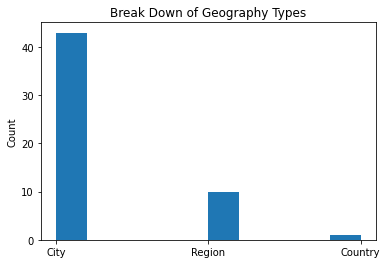

In [5]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
file = '/Users/zanderbonnet/Desktop/Math 167PS/Homework/Data/Avocado_2019-21.xlsx'
avacado = pd.read_excel(file)

fig, ax = plt.subplots()
ax.hist(avacado['Geography_type'].values[0::304])
ax.set_title(label = "Break Down of Geography Types")
ax.set_ylabel("Count");

This plot shows the break down of the regions that are included in this data set. I use every 305th point becasue every location has 305 data points so I only need to count each location once. This shows how the data is broken down so that the reader can see how man cities there are as well as how they reduce the dimensions by reducing them to regions.

(b) Investigate the relationship between *exactly two* variables in the data set. 

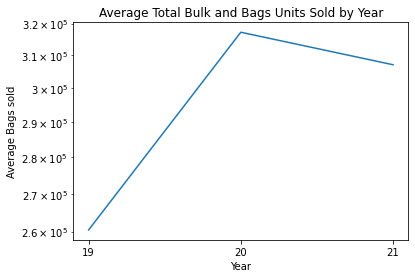

In [6]:
# YOUR CODE HERE
years = []
for i in range(len(avacado)):
    years.append(avacado['Current Year Week Ending'].values[i][-7:-5])
avacado.insert(0,"Year", years)
mix = avacado.groupby(['Geography_type',"Year"])['Total Bulk and Bags Units'].mean()

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(mix["City"])
ax.set_title("Average Total Bulk and Bags Units Sold by Year")
ax.set_ylabel("Average Bags sold")
ax.set_xlabel("Year");

This graph shows the average total number of bags sold over the three years that the data has. This shows that there was a downward trend in avacado purchases between 2020 and 2021. This graph shows the trend of avacado purchases over the last three years.

(c) Investigate the relationship between *exactly three* variables in the data set in a single graph. 

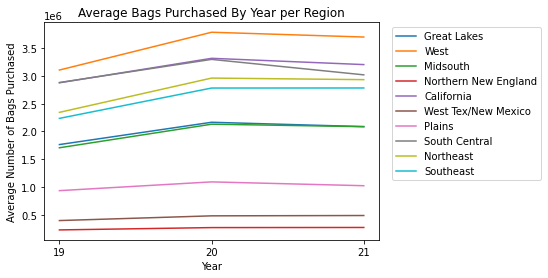

In [7]:
# YOUR CODE HERE
mix2 = avacado.groupby(['Geography_type',"Geography", "Year"])['Total Bulk and Bags Units'].mean()
labs = list(set(avacado[avacado.Geography_type == "Region"]['Geography'].values))
fig, ax = plt.subplots()
#ax.set_yscale('log')
for i in range(len(labs)):
    ax.plot(mix2["Region"][labs[i]], label = labs[i])
ax.set_title("Average Bags Purchased By Year per Region")
ax.set_ylabel("Average Number of Bags Purchased")
ax.set_xlabel("Year")
ax.legend(bbox_to_anchor = (1.5,1));

This plot shows the average number of bags of avacados sold per year per region. We can see what regions purchase the most avacados and the trends of each region as well.

(d) Investigate the relationship between *exactly four* variables in the data set using a panel plot.

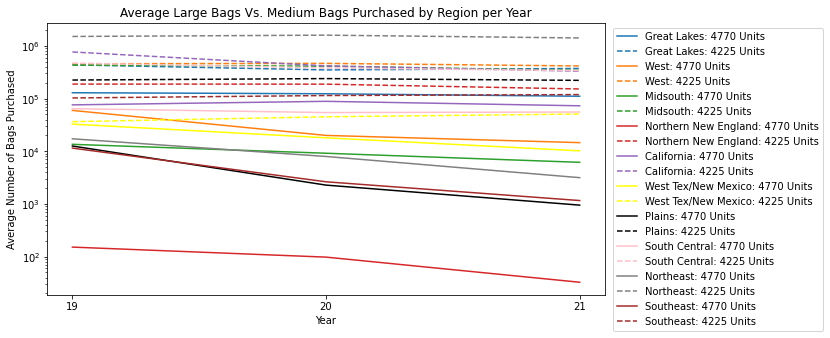

In [9]:
# YOUR CODE HERE
mix3 = avacado.groupby(['Geography_type',"Geography", "Year"])['4770 Units'].mean()
mix4 = avacado.groupby(['Geography_type',"Geography", "Year"])['4225 Units'].mean()
labs = list(set(avacado[avacado.Geography_type == "Region"]['Geography'].values))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'yellow', 'black', 'pink', 'grey', 'brown']
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 5]
ax.set_yscale('log')

for i in range(len(labs)):
    ax.plot(mix3["Region"][labs[i]], label = labs[i] + ": 4770 Units", linestyle = "solid", color = colors[i])
    ax.plot(mix4["Region"][labs[i]], label = labs[i] + ": 4225 Units", linestyle = "dashed", color = colors[i])
ax.set_title("Average Large Bags Vs. Medium Bags Purchased by Region per Year")
ax.set_ylabel("Average Number of Bags Purchased")
ax.set_xlabel("Year")
ax.legend(bbox_to_anchor = (1.4,1));

This graph displays the number of large bags (4770 units) and medium bags (4225 units) that each region purchased. This allows us to see the trends between the regions and the trends of what bags are being purchased within the reigons. It also still shows how many avacados are being purchased in the reigon.

**Note:** There are many possible solutions for this problem. You don't have to show the same graphs you'll see in the solution to obtain full credit. Here are the criteria that we will be grading on:

* did you pick non-trivial variable(s) to display (e.g., the distributions of "year" or "date" by themselves are not interesting)?
* do your graphs show exactly one, two, three or four variables as requested? 
* is your graph labeled sufficiently well so that it's easy to understand what one is looking at? 
* does the type of your graph make sense for the variable(s) you chose to display? (e.g., a bar graph of "Year" as a function of "Region" would not make any sense). 
* does your explanation make sense and fit the graph you created?